In [95]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [96]:
class MultiClassLogisticRegression:

    def __init__(self, X, y, random_seed=10):
        np.random.seed(random_seed)
        self.loss = []
        self.classes = np.unique(y)
        self.class_labels = {c: i for i, c in enumerate(self.classes)}
        self.weight = np.random.rand(len(self.classes), X.shape[1])
        self.Ti = self.one_hot_encoding(y)

    def one_hot_encoding(self, y):
        return np.eye(len(self.classes))[np.vectorize(lambda c: self.class_labels[c])(y).reshape(-1)]

    def predict(self, X, weight):
        z = np.dot(X, weight.T)
        return self.softmax(z)

    def softmax(self, z):
        z -= np.max(z, axis=1, keepdims=True)  # Numerical stability
        exp_z = np.exp(z)
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def cross_entropy_loss(self, probs, weight, n):
        epsilon = 1e-8 # Small epsilon value to prevent numerical instability
        clipped_probs = np.clip(probs, epsilon, 1 - epsilon)  # Clip probabilities to avoid extreme values
        l2 = np.sum(np.square(weight)) / (1/2)
        lam = 1/2
        return -(np.sum(self.Ti * np.log(clipped_probs))) / n  + l2 * lam
        # return -(np.sum(self.Ti * np.log(probs))) / n

    def cross_entropy_loss_gradient(self, X, probs, weight, n):
        lam = 1/2
        return -(np.dot(X.T, (self.Ti - probs))).T / n + weight * lam
    
    def predict_classes(self, X):
        probs = self.predict(X, self.weight)
        return np.vectorize(lambda c: self.classes[c] )(np.argmax(probs, axis=1)) 
    
    def score(self, X, y):
        return np.mean(self.predict_classes(X) == y)
    
    def armijo_line_search(self, X, gradient, direction, current_loss, alpha, rho, c):

        while alpha > 1e-8:
            new_weight = self.weight + alpha * direction
            probs = self.predict(X, new_weight)
            new_loss = self.cross_entropy_loss(probs, new_weight, len(X))
            armijo_condition = new_loss <= current_loss + c * alpha * np.sum(gradient * direction)
            if armijo_condition:
                break
            else:
                alpha *= rho
        return alpha

    def gradient_descend(self, X, max_epoch, threshold, alpha, rho, c):
        N = len(X)

        for _ in range(max_epoch):
            probs = self.predict(X, self.weight)
            loss = self.cross_entropy_loss(probs, self.weight, N)
            if loss <= threshold:
                break
            gradient = self.cross_entropy_loss_gradient(X, probs, self.weight, N)
            direction = -gradient
            lr = self.armijo_line_search(X, gradient, direction, loss, alpha, rho, c)
            self.weight = self.weight + lr * direction
            self.loss.append(loss)
            print(loss, lr)

        

In [97]:
MAX_EPOCH = 1000
ARMIJO_RHO = 0.90
ARMIJO_ALPHA = 1
ARMIJO_C = 1e-4
THRESHOLD = 0.001

X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)
lr = MultiClassLogisticRegression(X_train, y_train)


lr.gradient_descend(X_train, MAX_EPOCH, THRESHOLD, ARMIJO_ALPHA, ARMIJO_RHO, ARMIJO_C)

plt.xscale('log')
plt.plot(np.arange(len(lr.loss)), lr.loss)
plt.title("Development of loss during Training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

6.336140677922986 0.16677181699666577
6.220280777124108 0.25418658283290013
6.103532469477157 0.16677181699666577
5.489472318813942 0.2058911320946491
4.889681346828288 0.2058911320946491
4.403630075187111 0.2058911320946491
4.248963466991686 0.2058911320946491
4.2230011707038635 0.2058911320946491
3.7132206997284585 0.1853020188851842
3.3664379704720866 0.16677181699666577
2.9098492504713453 0.13508517176729928
2.603021379093021 0.1500946352969992
2.5340049840067276 0.12157665459056936
2.4954357529602844 0.1500946352969992
2.4297557246959562 0.10941898913151243
2.15964977710757 0.13508517176729928
2.1365665697608165 0.0984770902183612
1.9660635510533193 0.12157665459056936
1.9307675936598452 0.0984770902183612
1.927771933444403 0.10941898913151243
1.730834607755538 0.08862938119652508
1.6871422024139653 0.0984770902183612
1.5944343325747907 0.07976644307687257
1.5368059167866561 0.08862938119652508
1.4652187762728912 0.07178979876918531
1.4065547000181104 0.07976644307687257
1.3604520

In [ ]:
sklearn_lg = linear_model.LogisticRegression("l2", max_iter = MAX_EPOCH, solver='lbfgs' )
sklearn_lg.fit(X_train, y_train)

print(lr.score(X_test, y_test), sklearn_lg.score(X_test, y_test))


0.7523809523809524 0.9619047619047619


218.24074012265214 0.47829690000000014
207.47017020150088 0.22876792454961012
206.70977669569456 0.38742048900000015
190.02295120692756 0.38742048900000015
184.7988005547806 0.5314410000000002
170.33557929403963 0.5314410000000002
149.92020087457817 0.25418658283290013
149.10586544500836 0.28242953648100017
146.2162150025012 0.31381059609000017
137.88981819821234 0.38742048900000015
128.03178319996235 0.34867844010000015
123.82506885430449 0.34867844010000015
114.46499277442076 0.25418658283290013
112.06978626511162 0.5904900000000002
100.43734459177597 0.22876792454961012
98.16734321231972 0.28242953648100017
91.87925724824049 0.38742048900000015
88.34084818181344 0.2058911320946491
86.13605389838094 0.34867844010000015
86.022893950477 0.13508517176729928
84.74665403067849 0.38742048900000015
80.18616579758017 0.28242953648100017
74.1734474689151 0.22876792454961012
71.68353541138863 0.2058911320946491
67.50856618532208 0.31381059609000017
65.1249699533284 0.16677181699666577
64.22554

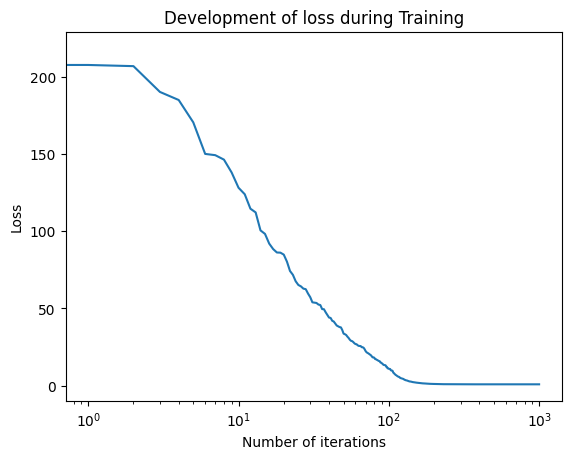

In [100]:
MAX_EPOCH = 1000
ARMIJO_RHO = 0.9
ARMIJO_ALPHA = 1
ARMIJO_C = 1e-4
THRESHOLD = 0.001

X, y = datasets.load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)
lr = MultiClassLogisticRegression(X_train, y_train)
lr.gradient_descend(X_train, MAX_EPOCH, THRESHOLD, ARMIJO_ALPHA, ARMIJO_RHO, ARMIJO_C)
plt.xscale('log')
plt.plot(np.arange(len(lr.loss)), lr.loss)
plt.title("Development of loss during Training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

In [101]:
sklearn_lg = linear_model.LogisticRegression("l2", max_iter = MAX_EPOCH, solver='lbfgs' )
sklearn_lg.fit(X_train, y_train)

print(lr.score(X_test, y_test), sklearn_lg.score(X_test, y_test))


0.9491255961844197 0.9475357710651828


51789.42326279224 1
14153.446627644369 1
4450.097354449598 1
2182.55206920844 1
1613.2632110655752 1
1465.9145602402816 1
1419.9869448712766 1
1169.69014506606 1
570.1134249368245 0.4
487.7701810541808 0.4
438.62966030401003 1
331.29816520668464 0.16000000000000003
284.61774114124233 0.16000000000000003
246.39427859788682 0.4
165.35370146103728 0.16000000000000003
149.8993832088462 0.16000000000000003
125.33166928353216 0.4
113.43366477640154 0.16000000000000003
94.34118609198 0.4
75.90644101012221 0.16000000000000003
63.43089861272564 0.06400000000000002
58.527138389304405 0.4
54.74675110223397 0.06400000000000002
50.452557127664235 0.06400000000000002
45.52518745721231 0.16000000000000003
42.14312678527114 0.06400000000000002
38.93772281039624 0.4
36.89885807471872 0.06400000000000002
33.0903094013643 0.06400000000000002
31.13972064146182 0.16000000000000003
27.921178293828994 0.06400000000000002
25.989040783320334 0.16000000000000003
24.957881112329343 0.06400000000000002
22.6901820

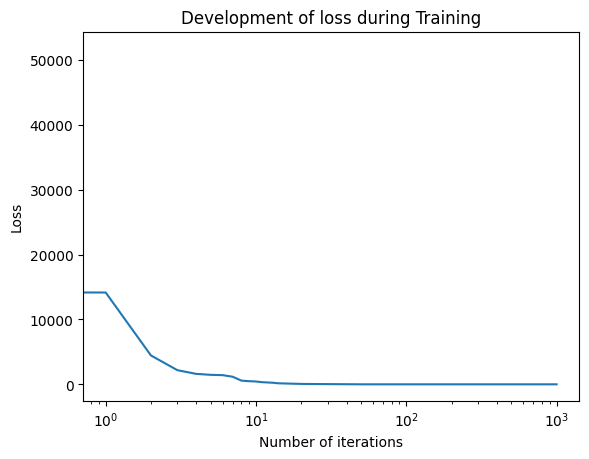

In [104]:
MAX_EPOCH = 1000
ARMIJO_RHO = 0.4
ARMIJO_ALPHA = 1
ARMIJO_C = 1e-3
THRESHOLD = 0.001

X, y = datasets.fetch_olivetti_faces(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=10)
lr = MultiClassLogisticRegression(X_train, y_train)
lr.gradient_descend(X_train, MAX_EPOCH, THRESHOLD, ARMIJO_ALPHA, ARMIJO_RHO, ARMIJO_C)
plt.xscale('log')
plt.plot(np.arange(len(lr.loss)), lr.loss)
plt.title("Development of loss during Training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

In [107]:
sklearn_lg = linear_model.LogisticRegression("l2", max_iter = MAX_EPOCH, solver='lbfgs' )
sklearn_lg.fit(X_train, y_train)

print(lr.score(X_test, y_test), sklearn_lg.score(X_test, y_test))

0.8313659359190556 0.9418212478920742


176.0481351802379 1
45.24961066595806 1
15.337405723996698 1
8.519970989467726 1
6.309450118447373 1
5.881396927609089 0.5
1.6855030868619463 0.5
1.5789831058127755 0.5
1.4426941936944833 0.25
1.3833751546417736 1
1.2954793364877402 0.25
1.2921945819565517 1
1.2700182026626758 0.125
1.2697308094670343 7.450580596923828e-09
1.2697308094973179 7.450580596923828e-09
1.2697308095276019 7.450580596923828e-09
1.2697308095578856 7.450580596923828e-09
1.2697308095881694 7.450580596923828e-09
1.2697308096184534 7.450580596923828e-09
1.269730809648737 7.450580596923828e-09
1.269730809679021 7.450580596923828e-09
1.269730809709305 7.450580596923828e-09
1.2697308097395887 7.450580596923828e-09
1.2697308097698725 7.450580596923828e-09
1.2697308098001563 7.450580596923828e-09
1.26973080983044 7.450580596923828e-09
1.2697308098607238 7.450580596923828e-09
1.2697308098910076 7.450580596923828e-09
1.2697308099212914 7.450580596923828e-09
1.2697308099515756 7.450580596923828e-09
1.2697308099818594 7.450

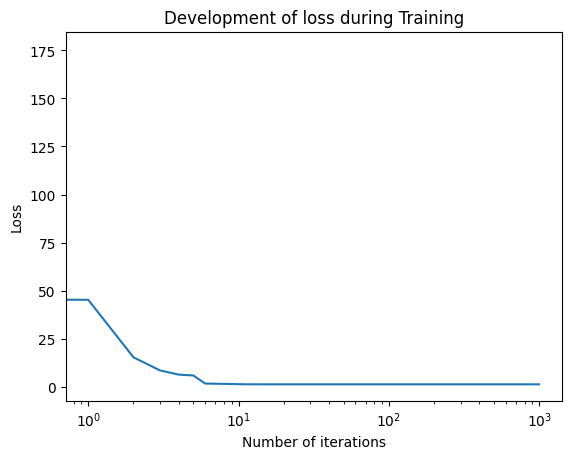

In [105]:
from file_reader import get_dna_data

X_train, y_train = get_dna_data('dna_train.txt')
X_test , y_test = get_dna_data('dna_test.txt')

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)


MAX_EPOCH = 1000
ARMIJO_RHO = 0.5
ARMIJO_ALPHA = 1
ARMIJO_C = 1e-4
THRESHOLD = 0.001

lr = MultiClassLogisticRegression(X_train, y_train)
lr.gradient_descend(X_train, MAX_EPOCH, THRESHOLD, ARMIJO_ALPHA, ARMIJO_RHO, ARMIJO_C)
plt.xscale('log')
plt.plot(np.arange(len(lr.loss)), lr.loss)
plt.title("Development of loss during Training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

In [106]:
sklearn_lg = linear_model.LogisticRegression("l2", max_iter = MAX_EPOCH, solver='lbfgs' )
sklearn_lg.fit(X_train, y_train)

print(lr.score(X_test, y_test), sklearn_lg.score(X_test, y_test))

0.8313659359190556 0.9418212478920742
